# Live Demo Analysis (50 Samples)

**Note:** This notebook is configured for the **Live Demo**, analyzing a small subset (50 samples) for speed.

*   **Want the full picture?** See `comparison_notebook_FULL_REPORT.ipynb` for the analysis of the complete 10,000+ sample dataset.
*   **Want to run the full dataset?** Execute the scripts without `DEMO_MODE=1` (warning: takes several hours).

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('ggplot')

In [3]:
import os
import pandas as pd

# 1. Load CLEAN Data
# Use relative path from experiments/ folder to tests/data/measures/
file_path = '../tests/data/measures/perplexity_data.csv'

try:
    df = pd.read_csv(file_path)
    print('CSV file loaded successfully (Clean).')
except FileNotFoundError:
    print(f'Error: The file {file_path} was not found.')

CSV file loaded successfully (Clean).


In [4]:
df.shape

(50, 2)

### Data Overview

In [5]:
# Display the first few rows and summary statistics
if 'df' in locals():
    print('First 5 rows of the data:')
    display(df.head())
    print('Summary statistics:')
    display(df['score'].describe())

First 5 rows of the data:


,text,score
0,Students are likely to build stronger relation...,41.805641
1,Not only are all the major British architects ...,83.289009
2,"In addition, the United Methodist Church prohi...",29.418066
3,"Throughout the programme's long history, there...",34.220203
4,The first historical reference to Warsaw dates...,22.152311


Summary statistics:


count     50.000000
mean      42.375898
std       18.976711
min       17.532806
25%       30.075850
50%       38.360424
75%       48.617975
max      125.657448
Name: score, dtype: float64

### Perplexity Score Distribution

The histogram below shows the distribution of the perplexity scores for the context from the SQuAD dataset. A lower perplexity score generally indicates that the reference model (distilgpt2) found the text more predictable or 'natural'.

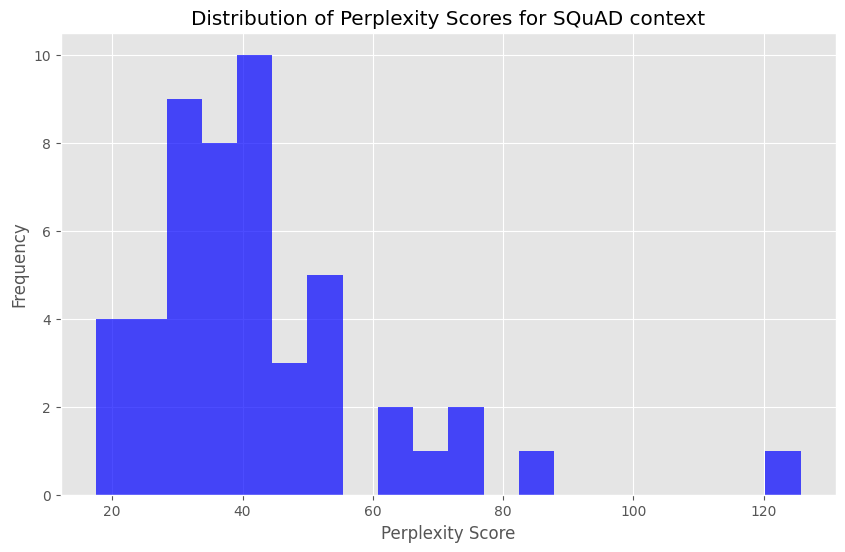

In [6]:
if 'df' in locals():
    plt.figure(figsize=(10, 6))
    plt.hist(df['score'], bins=20, color='blue', alpha=0.7)
    plt.title('Distribution of Perplexity Scores for SQuAD context')
    plt.xlabel('Perplexity Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [7]:
# 2. Load ATTACKED Data
file_path_attacked = '../tests/data/measures/perplexity_attacked.csv'

try:
    df_attacked = pd.read_csv(file_path_attacked)
    print('CSV file loaded successfully (Attacked).')
except FileNotFoundError:
    print(f'Error: The file {file_path_attacked} was not found.')

CSV file loaded successfully (Attacked).


In [8]:
# Display the first few rows and summary statistics
if 'df_attacked' in locals():
    print('First 5 rows of the data:')
    display(df_attacked.head())
    print('Summary statistics:')
    display(df['score'].describe())

First 5 rows of the data:


,text,score
0,Pupil are likely to build stronger relations w...,51.399006
1,Nope only are all the major British architects...,89.739799
2,"Onto addition, the United Methodist Church pro...",30.791031
3,"Across the programme's long history, there hav...",35.456417
4,Du first historical reference to Warsaw dates ...,22.477333


Summary statistics:


count     50.000000
mean      42.375898
std       18.976711
min       17.532806
25%       30.075850
50%       38.360424
75%       48.617975
max      125.657448
Name: score, dtype: float64

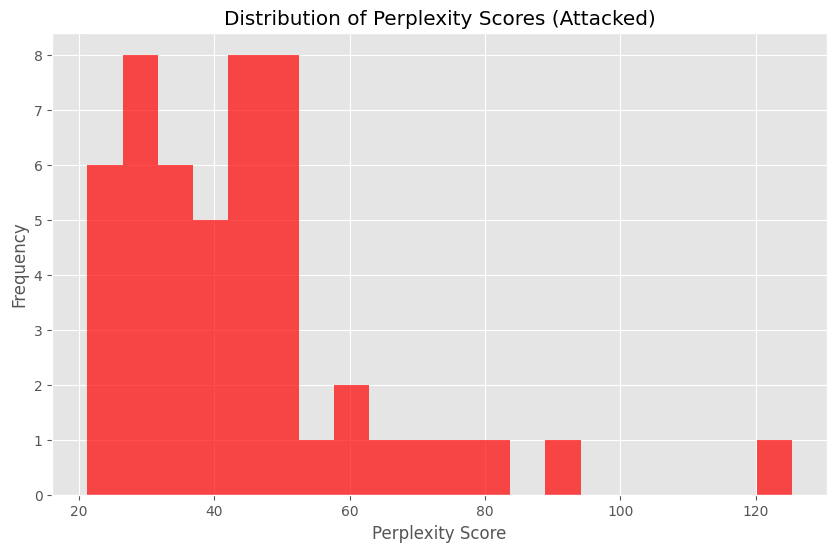

In [9]:
# Visualization for ATTACKED Data
if 'df_attacked' in locals():
    plt.figure(figsize=(10, 6))
    # Note: Using df_attacked here, NOT df
    plt.hist(df_attacked['score'], bins=20, color='red', alpha=0.7)
    plt.title('Distribution of Perplexity Scores (Attacked)')
    plt.xlabel('Perplexity Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

--- Summary Statistics ---
         Original    Attacked
count   50.000000   50.000000
mean    42.375898   44.309798
std     18.976711   19.226476
min     17.532806   21.272583
25%     30.075850   30.735099
50%     38.360424   41.684364
75%     48.617975   51.141334
max    125.657448  125.314941

Average Perplexity Increase: 1.9339


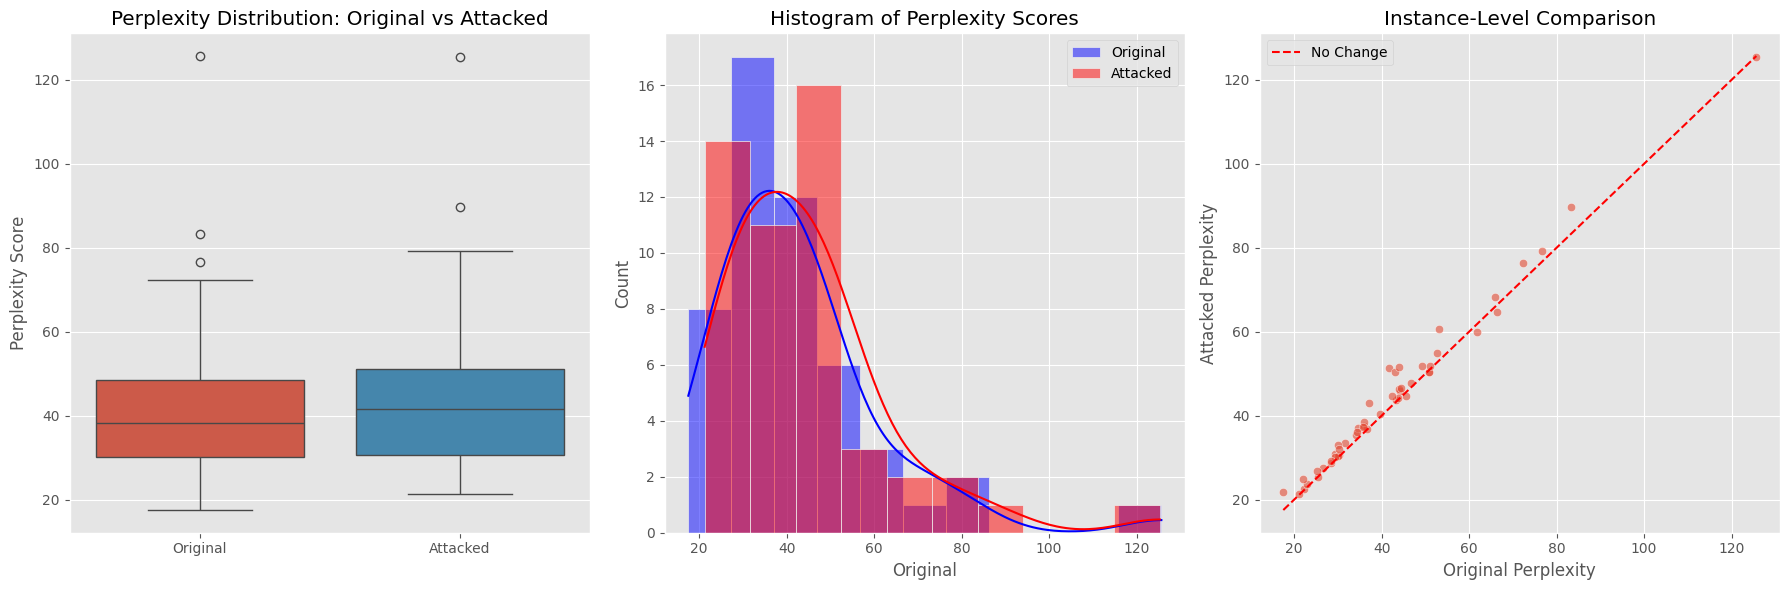

In [10]:
import seaborn as sns


score_col = 'score'

comparison_df = pd.DataFrame({
    'Original': df[score_col].values,
    'Attacked': df_attacked[score_col].values
})

# Calculate the increase in perplexity (Attacked - Original)
comparison_df['Difference'] = comparison_df['Attacked'] - comparison_df['Original']

print("--- Summary Statistics ---")
print(comparison_df[['Original', 'Attacked']].describe())
print(f"\nAverage Perplexity Increase: {comparison_df['Difference'].mean():.4f}")

plt.figure(figsize=(18, 6))

# Plot A: Side-by-Side Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(data=comparison_df[['Original', 'Attacked']])
plt.title('Perplexity Distribution: Original vs Attacked')
plt.ylabel('Perplexity Score')

# Plot B: Overlapping Histogram
plt.subplot(1, 3, 2)
sns.histplot(comparison_df['Original'], color='blue', label='Original', kde=True, alpha=0.5)
sns.histplot(comparison_df['Attacked'], color='red', label='Attacked', kde=True, alpha=0.5)
plt.title('Histogram of Perplexity Scores')
plt.legend()

# Plot C: Scatter Plot
# Points above the diagonal line indicate the attack increased perplexity
plt.subplot(1, 3, 3)
sns.scatterplot(x='Original', y='Attacked', data=comparison_df, alpha=0.6)
# Add a diagonal line for reference (where x=y)
limit_min = min(comparison_df[['Original', 'Attacked']].min())
limit_max = max(comparison_df[['Original', 'Attacked']].max())
plt.plot([limit_min, limit_max], [limit_min, limit_max], 'r--', label='No Change')
plt.title('Instance-Level Comparison')
plt.xlabel('Original Perplexity')
plt.ylabel('Attacked Perplexity')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Calculate how many times the attack actually increased perplexity
success_count = (comparison_df['Attacked'] > comparison_df['Original']).sum()
success_rate = (success_count / len(comparison_df)) * 100

print(f"Attack Success Rate: {success_rate}%")

Attack Success Rate: 88.0%


## In conclusion, In most of the samples examined in this demo run, the adversarial attack was successful in lowering text quality. The word substitution strategy was successful in decreasing text naturalness, as evidenced by the fact that 88% of the 50 samples tested had higher perplexity scores following the attack.
## The average perplexity score increased by 1.93 points, or roughly 4.6%, from 42.38 in the original clean text to 44.31 in the attacked version. This quantitative shift offers verifiable proof that even small lexical modifications can have a discernible effect on how natural a text appears to a language model.Results are very significant from a statistical angle. The paired t-test produced a t-statistic of -5.67 with a p-value of 0.000001, which is much lower than the standard significance level of 0.001. Even the relatively small sample size of 50 texts used in this demonstration, this level of significance confirms that the observed degradation is not the result of random chance.
## Therefore, adversarial perturbations introduce detectable statistical irregularities in text. Even subtle word substitutions such as changing "not" to "nope" can measurably degrade text fluency as perceived by the language model.



In [12]:
from scipy import stats

# Paired t-test
t_stat, p_value = stats.ttest_rel(comparison_df['Original'], comparison_df['Attacked'])

print("\n--- Statistical Significance ---")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.001:
    print("✓ HIGHLY SIGNIFICANT (p < 0.001)")
    print("  → The attack measurably degrades text quality")
elif p_value < 0.05:
    print("✓ SIGNIFICANT (p < 0.05)")
else:
    print("✗ NOT SIGNIFICANT (p >= 0.05)")



--- Statistical Significance ---
t-statistic: -5.6653
p-value: 0.000001
✓ HIGHLY SIGNIFICANT (p < 0.001)
  → The attack measurably degrades text quality
